# Cleaning Data: 

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) Data Set .csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,Begnin,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data.shape

(569, 32)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [10]:
data.drop('id', inplace=True, axis=1)
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [11]:
data.shape

(569, 31)

In [12]:
data['diagnosis'].unique()

array(['M', 'B', 'Malignant', 'Begnin'], dtype=object)

In [13]:
data = data.replace(['Malignant','Begnin'],['M', 'B'])
print(data)

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              

In [14]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
categorical_data= data[['diagnosis']]
categorical_data.head(2)

,diagnosis
0,M
1,M


In [16]:
categorical_data

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [17]:
numerical_data= data.drop(categorical_data, axis=1)
numerical_data.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [18]:
numerical_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Analysis 

## Label Encoding 

In [19]:
le = preprocessing.LabelEncoder()

data['diagnosis'] = le.fit_transform(data.diagnosis)

data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [20]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [21]:
label_encoder=categorical_data.apply(le.fit_transform)
label_encoder.head(2)

,diagnosis
0,1
1,1


In [22]:
data['diagnosis'].nunique()

2

In [23]:
label_encoder

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [24]:
data_label_encoded=pd.concat([numerical_data, label_encoder], axis=1)
data_label_encoded.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1


## Splitting the features and target 

In [25]:
x = data_label_encoded.drop(['diagnosis'],axis=1)
y = data_label_encoded['diagnosis']

In [26]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

## Split the data to train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Model Training

### XGBoost:

In [29]:
 import xgboost as xgb

In [30]:
# Here, we are using XGBClassifier as a Machine Learning model to fit the data.
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
print(); print(model)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [31]:
# Now we have predicted the output by passing x_test and also stored real target in expected_y.
expected_y  = y_test
predicted_y = model.predict(x_test)

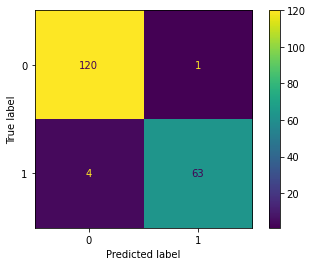

In [32]:
plot_confusion_matrix(model , x_test, y_test)

In [33]:
# Here we have printed classification report and confusion matrix for the classifier.
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.98      0.94      0.96        67

    accuracy                           0.97       188
   macro avg       0.98      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

[[120   1]
 [  4  63]]


### DecisionTreeClassifier

In [34]:
classifier_tree = DecisionTreeClassifier()

y_predict = classifier_tree.fit(x_train, y_train).predict(x_test)

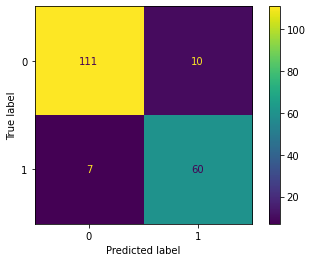

In [35]:
plot_confusion_matrix(classifier_tree , x_test, y_test)

In [36]:
print(classification_report(y_test, y_predict, target_names=le.classes_))

print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.94      0.92      0.93       121
           M       0.86      0.90      0.88        67

    accuracy                           0.91       188
   macro avg       0.90      0.91      0.90       188
weighted avg       0.91      0.91      0.91       188

[[111  10]
 [  7  60]]


### DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

regressor = DecisionTreeRegressor(max_depth=3)

regressor.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [38]:
text_representation = tree.export_text(regressor, feature_names = x.columns.tolist())

print(text_representation)

|--- concave points_mean <= 0.05
|   |--- radius_worst <= 16.83
|   |   |--- area_se <= 48.70
|   |   |   |--- value: [0.01]
|   |   |--- area_se >  48.70
|   |   |   |--- value: [0.67]
|   |--- radius_worst >  16.83
|   |   |--- texture_worst <= 19.91
|   |   |   |--- value: [0.00]
|   |   |--- texture_worst >  19.91
|   |   |   |--- value: [0.78]
|--- concave points_mean >  0.05
|   |--- perimeter_worst <= 90.38
|   |   |--- concavity_se <= 0.03
|   |   |   |--- value: [1.00]
|   |   |--- concavity_se >  0.03
|   |   |   |--- value: [0.00]
|   |--- perimeter_worst >  90.38
|   |   |--- concavity_worst <= 0.22
|   |   |   |--- value: [0.20]
|   |   |--- concavity_worst >  0.22
|   |   |   |--- value: [0.97]



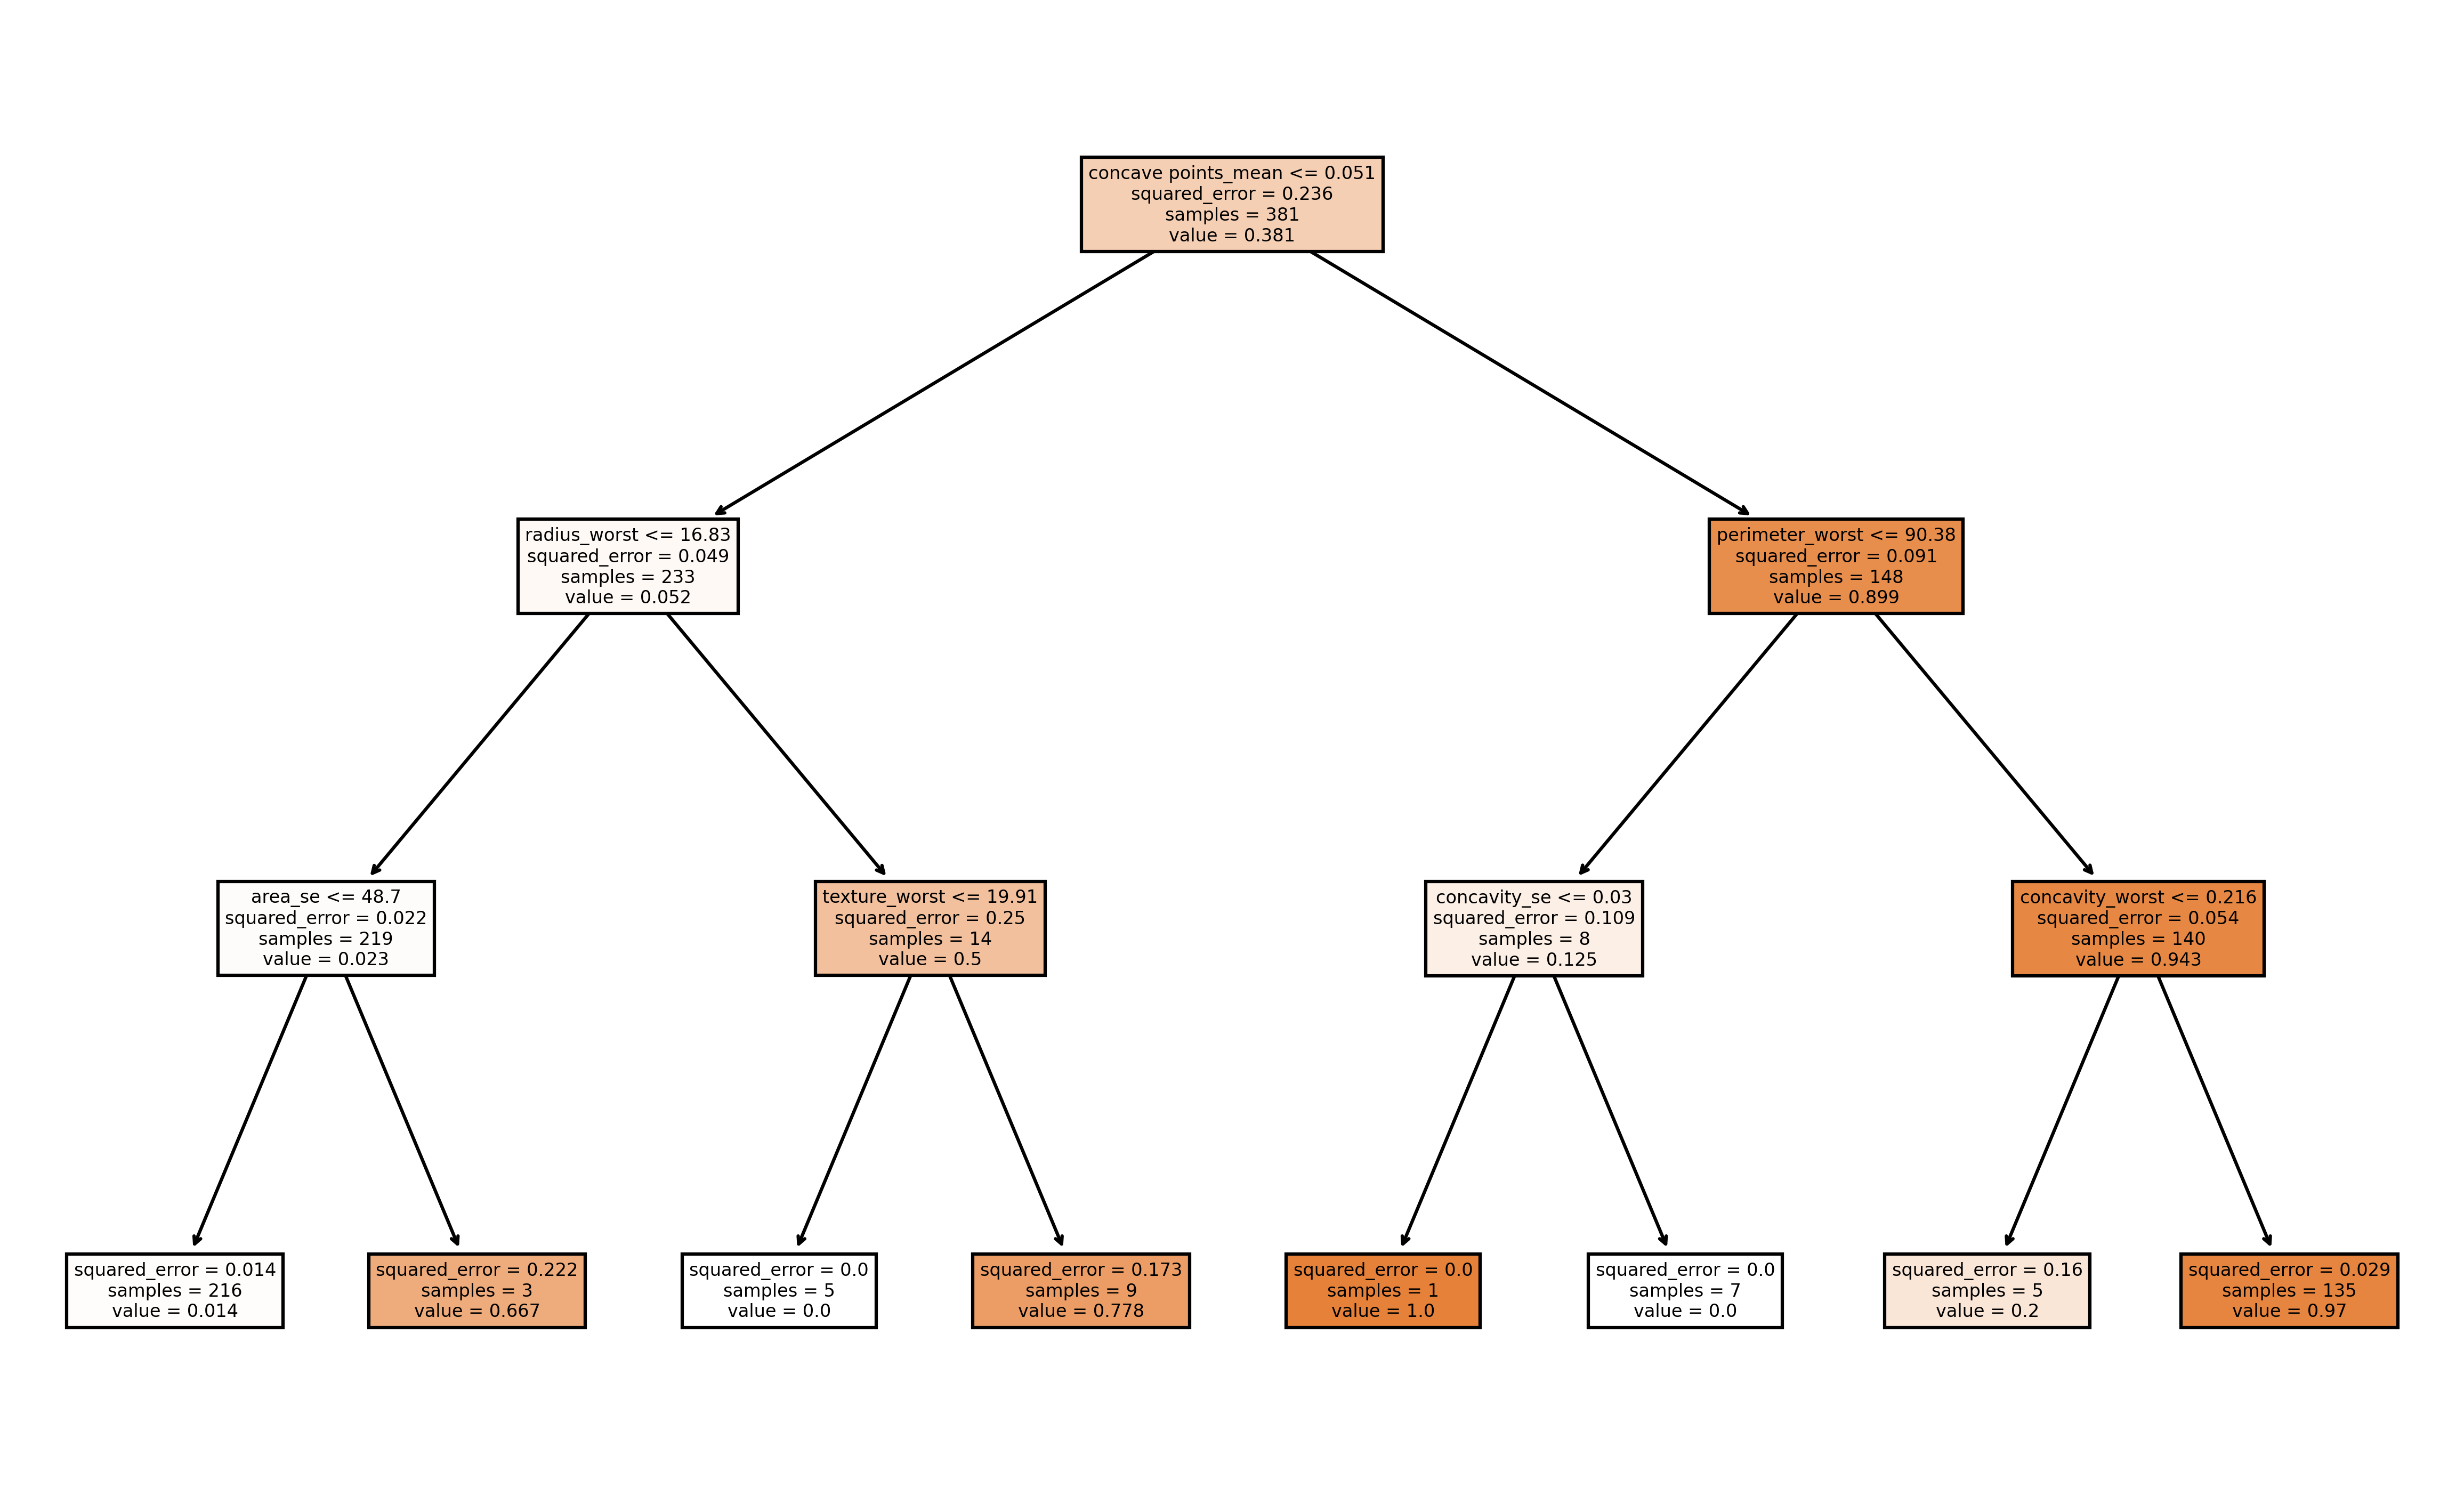

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,8), dpi=450)

_ =tree.plot_tree(regressor,  feature_names=x.columns,  filled=True)

In [40]:
importances = regressor.feature_importances_

importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.81239684, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01576958, 0.        ,
       0.        , 0.01094376, 0.        , 0.        , 0.        ,
       0.03747306, 0.02431947, 0.06330962, 0.        , 0.        ,
       0.        , 0.03578767, 0.        , 0.        , 0.        ])

In [41]:
pd.DataFrame(importances, index = x.columns, columns=["Importance"])

,Importance
radius_mean,0.000000
texture_mean,0.000000
perimeter_mean,0.000000
area_mean,0.000000
smoothness_mean,0.000000
compactness_mean,0.000000
concavity_mean,0.000000
concave points_mean,0.812397
symmetry_mean,0.000000
fractal_dimension_mean,0.000000


<AxesSubplot:>

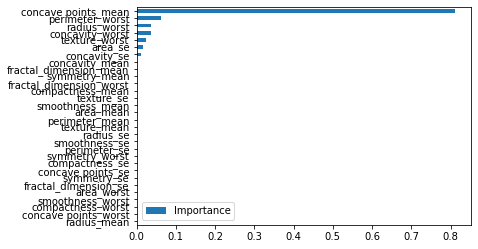

In [42]:
pd.DataFrame(importances, index = x.columns, columns=["Importance"]).sort_values(by='Importance'). plot(kind='barh')

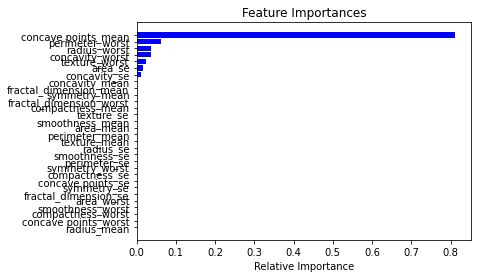

In [43]:
features = x.columns

importances = regressor.feature_importances_

indices = np.argsort(importances)


plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color='b', align='center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Classifier = RandomForestClassifier(n_estimators=20, random_state=0)
Classifier.fit(x_train, y_train)
y_pred = Classifier.predict(x_test)

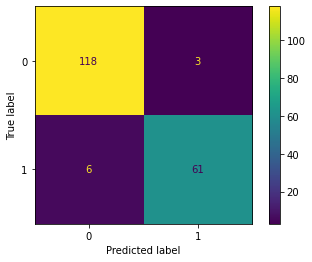

In [46]:
plot_confusion_matrix(Classifier , x_test, y_test)

In [47]:
# print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, target_names=le.classes_))
# print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       121
           M       0.95      0.91      0.93        67

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



#### GINI

In [48]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

# Fit the model
forest.fit(x_train, y_train)
 

# Measure model performance

y_pred = forest.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.952


### Logestic Regression

In [49]:
# Next, we need to create our model by instantiating an instance of the LogisticRegression object.
model = LogisticRegression()

In [50]:
# To train the model, we need to call the fit method on the LogisticRegression object we just created and pass in our 
# x_training_data and y_training_data variables
model.fit(x_train, y_train)

LogisticRegression()

In [51]:
# Making Predictions With Our Logistic Regression Model
predictions = model.predict(x_test)

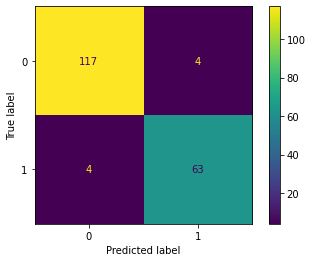

In [52]:
plot_confusion_matrix(model, x_test, y_test)

In [53]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

           0      0.967     0.967     0.967       121
           1      0.940     0.940     0.940        67

    accuracy                          0.957       188
   macro avg      0.954     0.954     0.954       188
weighted avg      0.957     0.957     0.957       188



In [54]:
print(confusion_matrix(y_test, predictions))

[[117   4]
 [  4  63]]


### KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
predictions = knn.predict(x_test)

In [59]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       121
           1       0.93      0.94      0.93        67

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



#### Elbow

In [60]:
test_error_rates = []
train_error_rates= []

for k in range(1,10):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train,y_train) 
   
    y_pred = knn_model.predict(x_test)
    y_pred_train = knn_model.predict(x_train)
    
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

Text(0.5, 0, 'K Value')

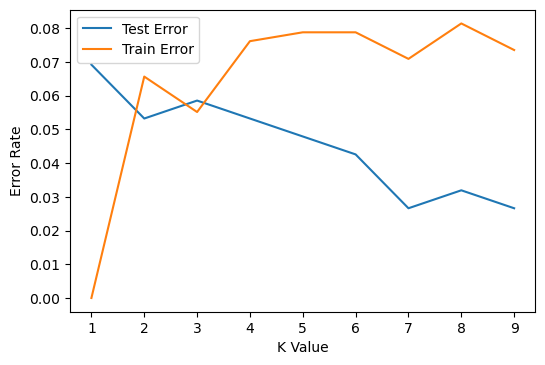

In [61]:
plt.figure(figsize=(6,4),dpi=100)
plt.plot(range(1,10),test_error_rates,label='Test Error')

plt.plot(range(1,10),train_error_rates,label='Train Error')

plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [62]:
knn_model = KNeighborsClassifier(n_neighbors=32)

In [63]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=32)

In [64]:
y_pred = knn_model.predict(x_test)

In [65]:
confusion_matrix(y_test, y_pred) 

array([[120,   1],
       [ 10,  57]], dtype=int64)

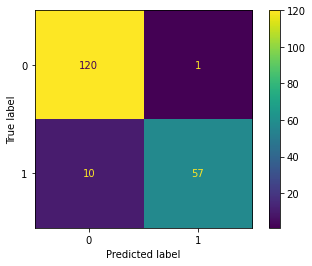

In [66]:
plot_confusion_matrix(knn_model, x_test, y_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       121
           1       0.98      0.85      0.91        67

    accuracy                           0.94       188
   macro avg       0.95      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



### SVM

In [68]:
from sklearn.svm import SVC

#### Linear Kernel

In [69]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred = svclassifier.predict(x_test)

In [71]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[117   4]
 [  4  63]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



#### Polynomial Kernel

In [72]:
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(x_train, y_train)

SVC(degree=8, kernel='poly')

In [73]:
y_pred = svclassifier.predict(x_test)

In [74]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121   0]
 [ 17  50]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       121
           1       1.00      0.75      0.85        67

    accuracy                           0.91       188
   macro avg       0.94      0.87      0.89       188
weighted avg       0.92      0.91      0.91       188



####  Gaussian Kernel

In [75]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [76]:
y_pred = svclassifier.predict(x_test)

In [77]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120   1]
 [  8  59]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       121
           1       0.98      0.88      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188



#### Sigmoid Kernel

In [78]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)

SVC(kernel='sigmoid')

In [79]:
y_pred = svclassifier.predict(x_test)

In [80]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[71 50]
 [58  9]]
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       121
           1       0.15      0.13      0.14        67

    accuracy                           0.43       188
   macro avg       0.35      0.36      0.36       188
weighted avg       0.41      0.43      0.42       188



### Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB

In [73]:
model = GaussianNB()

In [74]:
model.fit(x_train, y_train)

GaussianNB()

In [75]:
predictions = model.predict(x_test)

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       121
           1       0.92      0.91      0.92        67

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



#### Smote Tomek with Naive Bayes

In [77]:
from imblearn.combine import SMOTETomek 

In [78]:
smt = SMOTETomek(random_state=42)

In [79]:
x_res, y_res = smt.fit_resample(x, y)

In [80]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 348, 0: 348})


In [81]:
model = GaussianNB()

In [82]:
model.fit(x_res, y_res)

GaussianNB()

In [83]:
predictions = model.predict(x_test)

In [84]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       121
           1       0.94      0.94      0.94        67

    accuracy                           0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



#### Smote

In [85]:
from imblearn.over_sampling import SMOTE

In [86]:
sm = SMOTE(random_state = 2)

In [87]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

In [88]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (472, 30)
After OverSampling, the shape of train_y: (472,) 



In [89]:
model.fit(x_train_res, y_train_res)

GaussianNB()

In [90]:
predictions = model.predict(x_test)

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       121
           1       0.94      0.91      0.92        67

    accuracy                           0.95       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188



### Wrapper

In [108]:
from sklearn import datasets

boston = datasets.load_boston()

bos = pd.DataFrame(boston.data, columns = boston.feature_names)

bos['Price'] = boston.target

bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [109]:
x = bos.drop("Price" , axis=1)
y = bos['Price']

#### mlxtend

In [110]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

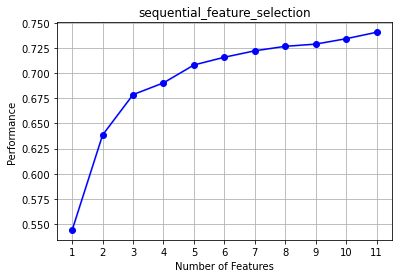

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

In [114]:
sfs = SFS(LinearRegression(),
         k_features=(3,11),
         forward=True,
         floating=False,
         scoring='r2',
         cv=0 
         )
sfs.fit(x,y)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fiq1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('sequential_feature_selection')
plt.grid()
plt.show()
sfs.k_feature_names_

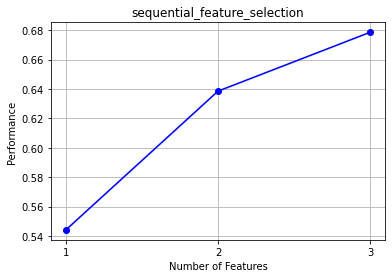

('RM', 'PTRATIO', 'LSTAT')

In [127]:
sfs = SFS(LinearRegression(),
         k_features=3,
         forward=True,
         floating=False,
         scoring='r2',
         cv=0 
         )
sfs.fit(x,y)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fiq1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('sequential_feature_selection')
plt.grid()
plt.show()
sfs.k_feature_names_

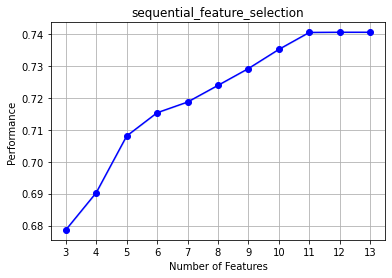

('RM', 'PTRATIO', 'LSTAT')

In [136]:
sfs = SFS(LinearRegression(),
         k_features=3,
         forward=False,
         floating=False,
         scoring='r2',
         cv=0 
         )
sfs.fit(x,y)

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fiq1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('sequential_feature_selection')
plt.grid()
plt.show()
sfs.k_feature_names_

#### sklearn

In [138]:
from sklearn.feature_selection import SequentialFeatureSelector as sfs

In [133]:
sfs1 = sfs(LinearRegression(),n_features_to_select=3,direction='forward',scoring='r2', cv=5)
sfs1.fit(x,y)


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3,
                          scoring='r2')

In [134]:
sfs1.get_feature_names_out(x.columns)

array(['CHAS', 'PTRATIO', 'LSTAT'], dtype=object)

In [139]:
sfs1 = sfs(LinearRegression(),n_features_to_select=3,direction='backward',scoring='r2', cv=5)
sfs1.fit(x,y)


SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=3, scoring='r2')

In [140]:
sfs1.get_feature_names_out(x.columns)

array(['DIS', 'PTRATIO', 'LSTAT'], dtype=object)